In [1]:
import sunpy
import sunpy.map
from matplotlib import colormaps as cm
from matplotlib.collections import LineCollection
import astropy.units as u
from astropy.visualization import ImageNormalize, AsinhStretch
from map_coalign import MapSequenceCoalign
import numpy as np
import importlib
import image_wavelet
importlib.reload(image_wavelet)
from image_wavelet import WPSImage
from glob import glob
from copy import deepcopy
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from image_wavelet import calculate_wps

In [2]:
eui_files = sorted(glob("../../src/EUI/HRI/euv174/20221024/coalign_step/*.fits"))
eui_map_seq_coalign = MapSequenceCoalign(sunpy.map.Map(eui_files[:]))


time = np.arange(360)*5.
scales = 5*np.logspace(1, 7,num=30, base=2)

In [3]:
eui_map_seq_east1 = eui_map_seq_coalign.submap([500,600]*u.pix, top_right=[670,760]*u.pix,)
eui_map_seq_noflow3 = eui_map_seq_coalign.submap([850,700]*u.pix,top_right=[1050,1000]*u.pix,)

In [4]:
eui_array_east1 = eui_map_seq_east1.as_array()
eui_array_noflow3 = eui_map_seq_noflow3.as_array()

In [5]:
east1_wps = WPSImage(scales, eui_array_east1, time,lag1=0.72)
noflow3_wps = WPSImage(scales, eui_array_noflow3, time,lag1=0.72)

east1_wps._wps_image()
noflow3_wps._wps_image()

/home/yjzhu/scripts/MyPy/image_wavelet.py:150: RuntimeWarning: Mean of empty slice
  global_ws_unbias_coi = np.nanmean(power_unbias_coi, axis=1)
/home/yjzhu/scripts/MyPy/image_wavelet.py:151: RuntimeWarning: Mean of empty slice
  global_ws_unbias_coi_sig = np.nanmean(power_unbias_coi_sig, axis=1)
/home/yjzhu/scripts/MyPy/image_wavelet.py:150: RuntimeWarning: Mean of empty slice
  global_ws_unbias_coi = np.nanmean(power_unbias_coi, axis=1)
/home/yjzhu/scripts/MyPy/image_wavelet.py:151: RuntimeWarning: Mean of empty slice
  global_ws_unbias_coi_sig = np.nanmean(power_unbias_coi_sig, axis=1)
/home/yjzhu/scripts/MyPy/image_wavelet.py:150: RuntimeWarning: Mean of empty slice
  global_ws_unbias_coi = np.nanmean(power_unbias_coi, axis=1)
/home/yjzhu/scripts/MyPy/image_wavelet.py:151: RuntimeWarning: Mean of empty slice
  global_ws_unbias_coi_sig = np.nanmean(power_unbias_coi_sig, axis=1)
/home/yjzhu/scripts/MyPy/image_wavelet.py:150: RuntimeWarning: Mean of empty slice
  global_ws_unbias_coi 

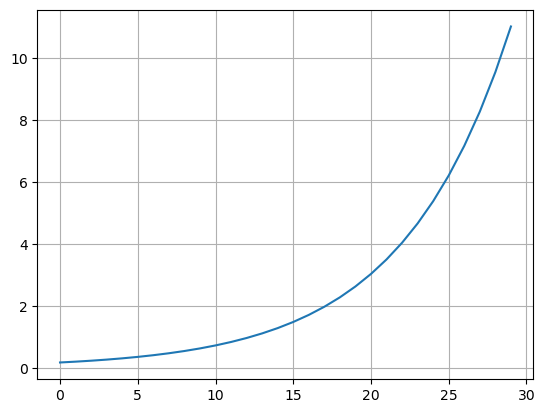

In [6]:
fig, ax = plt.subplots()
ax.plot(east1_wps.period/60.)
ax.grid('on')

/home/yjzhu/scripts/MyPy/image_wavelet.py:150: RuntimeWarning: Mean of empty slice
  global_ws_unbias_coi = np.nanmean(power_unbias_coi, axis=1)
/home/yjzhu/scripts/MyPy/image_wavelet.py:151: RuntimeWarning: Mean of empty slice
  global_ws_unbias_coi_sig = np.nanmean(power_unbias_coi_sig, axis=1)


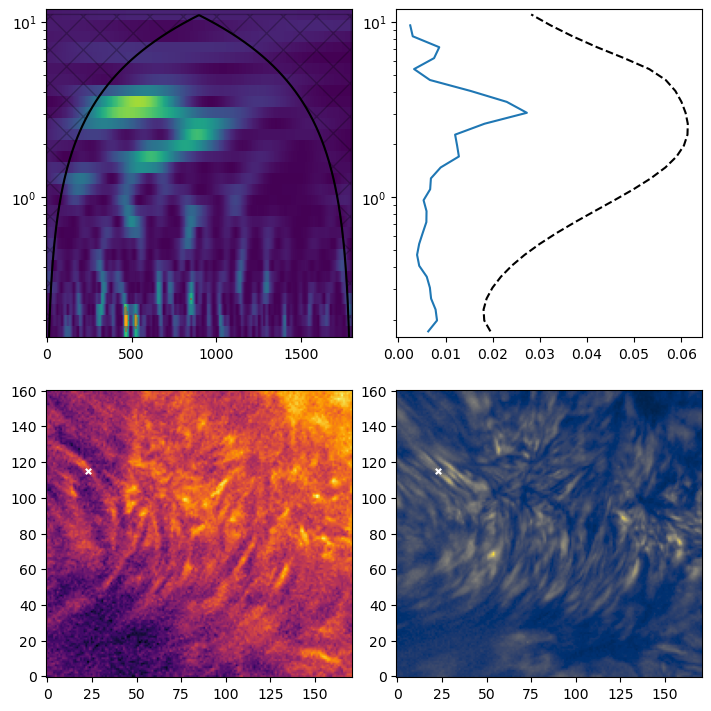

In [8]:
east1_wps.plot_single_ws(23,115)

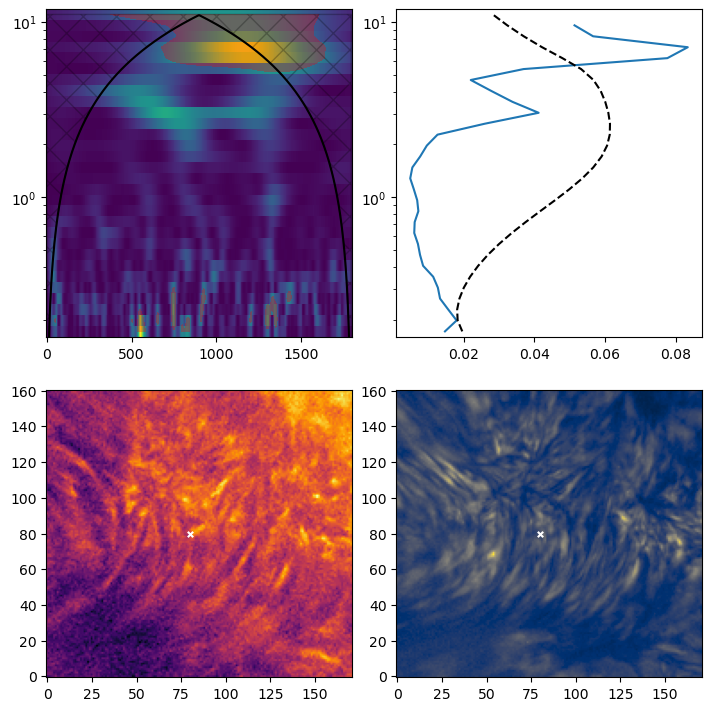

In [9]:
east1_wps.plot_single_ws(80,80)

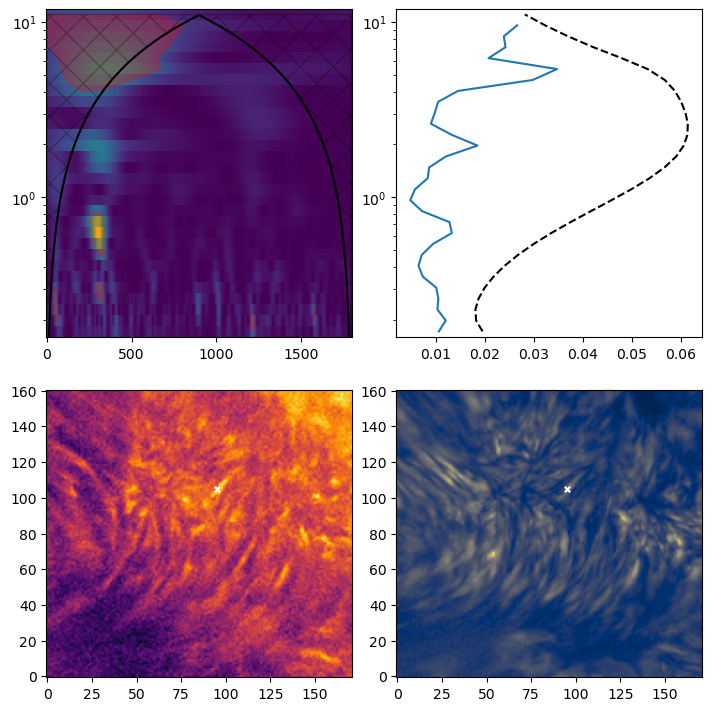

In [13]:
east1_wps.plot_single_ws(95,105)

In [ ]:
plt.plot(time, eui)

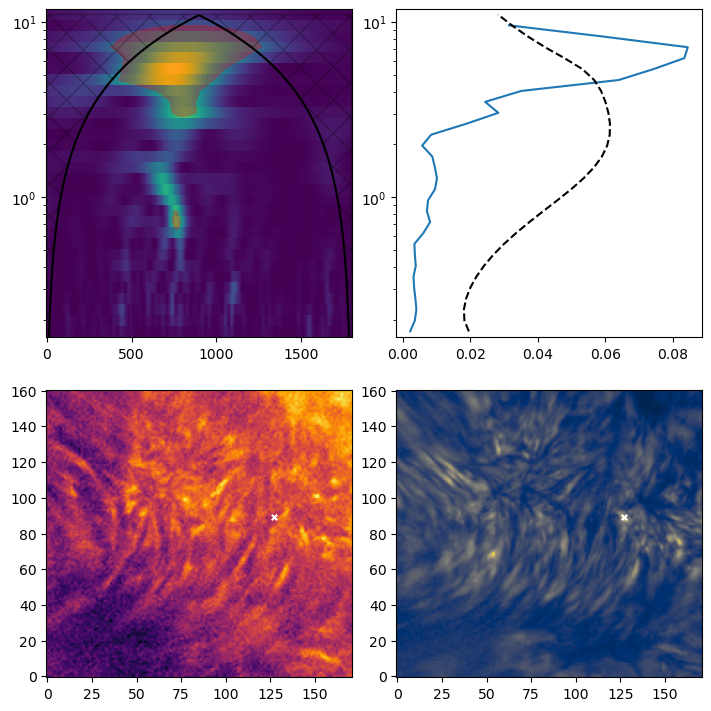

In [18]:
east1_wps.plot_single_ws(127,89)

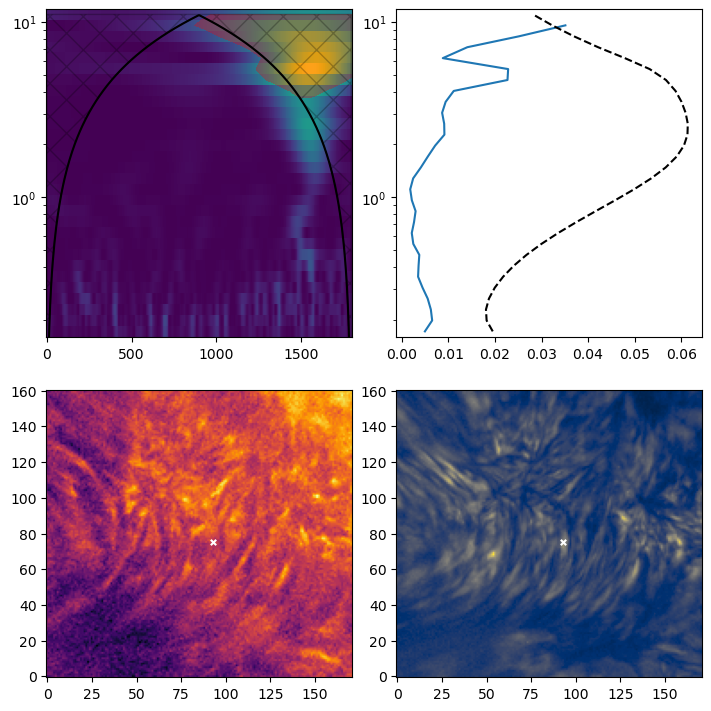

In [21]:
east1_wps.plot_single_ws(93,75)

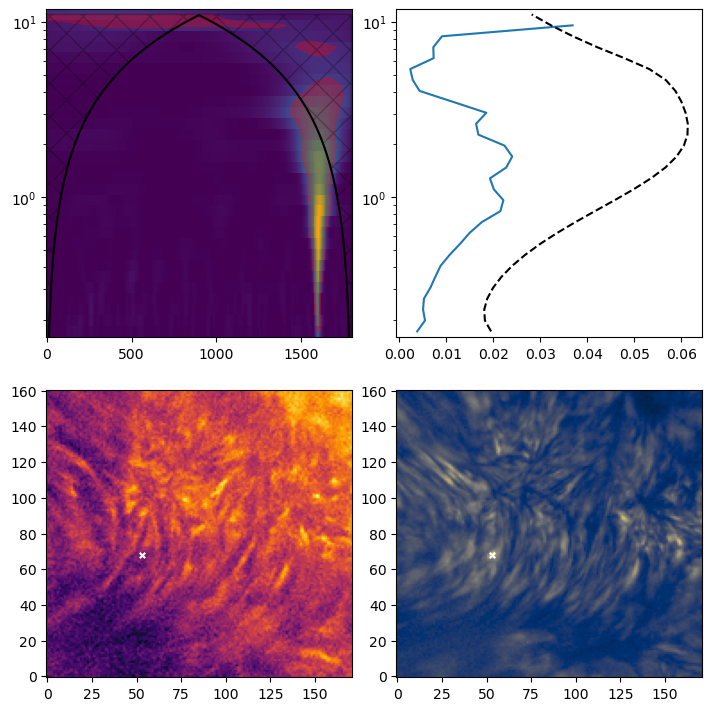

In [25]:
east1_wps.plot_single_ws(53,68)

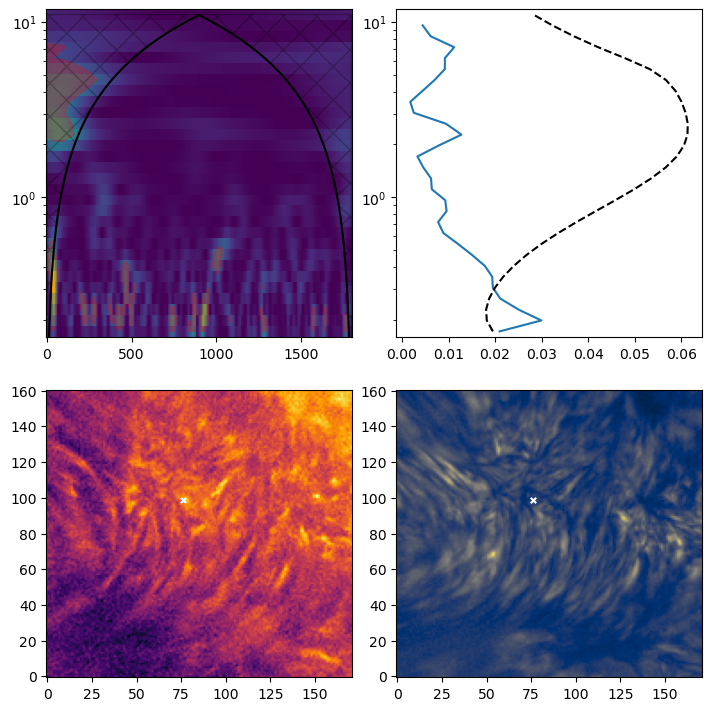

In [31]:
east1_wps.plot_single_ws(76,99)

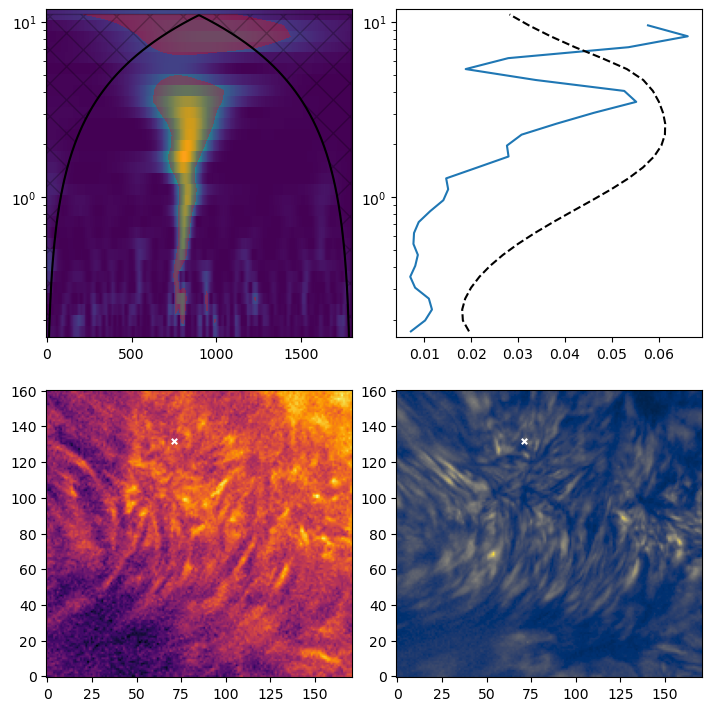

In [11]:
east1_wps.plot_single_ws(71,132)

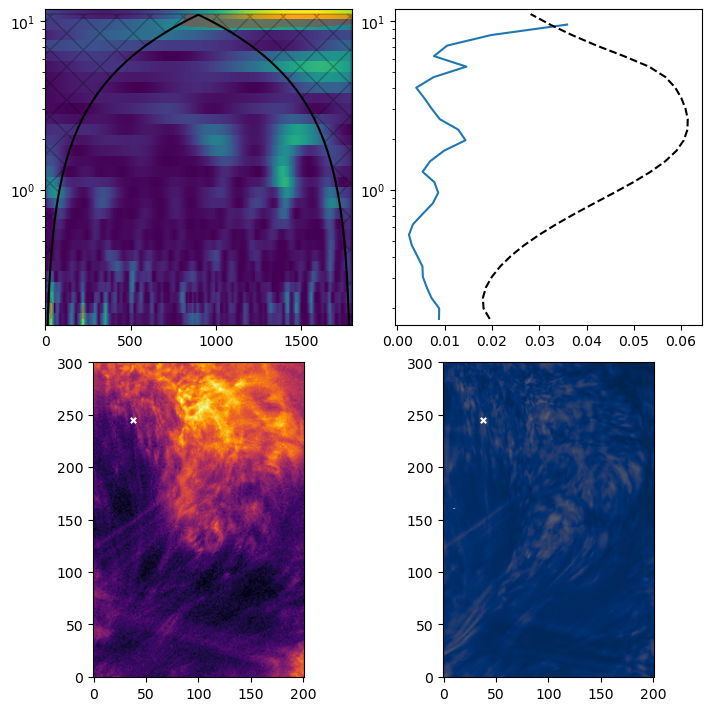

In [38]:
noflow3_wps.plot_single_ws(38,245)

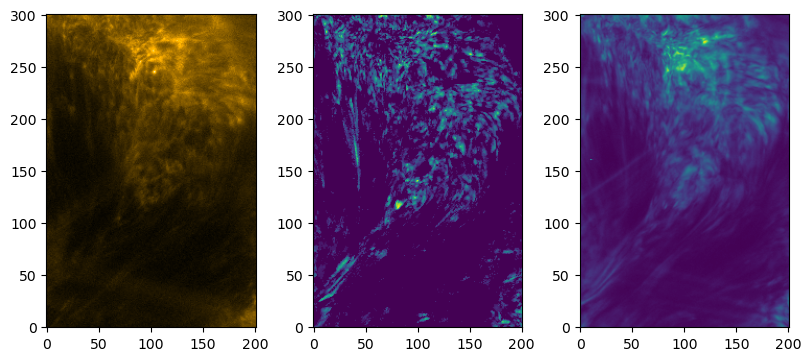

In [32]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(8,4),layout='constrained')

ax1.imshow(eui_array_noflow3[:,:,181],origin='lower',cmap='sdoaia171')
ax2.imshow(np.nansum((noflow3_wps.global_ws_unbias_coi_sig*noflow3_wps.scales[None,None,:])[:,:,17:27],axis=2),origin='lower')
ax3.imshow(np.nanstd(eui_array_noflow3,axis=2),origin='lower')

In [33]:
def get_line_segs(x, ys, *args, **kwargs):
    ny, nx = ys.shape

    segs = np.zeros((ny, nx, 2))
    segs[:,:,1] = ys
    segs[:,:,0] = x

    return LineCollection(segs, *args, **kwargs)

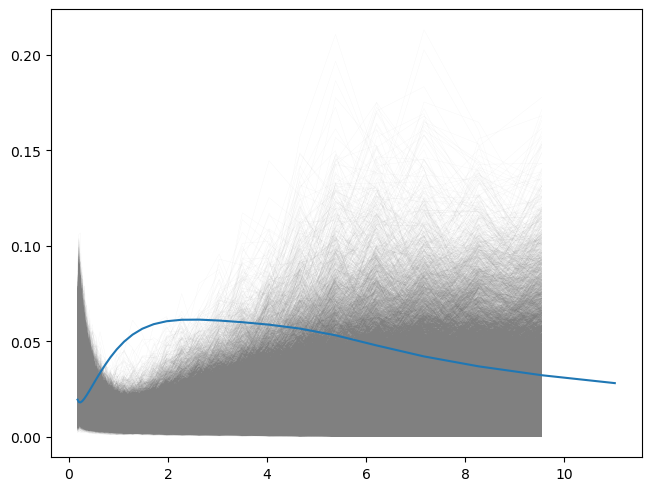

In [34]:
line_collections_east1_global_ws = get_line_segs(east1_wps.period/60., east1_wps.global_ws_unbias_coi.reshape(-1,east1_wps.global_ws_unbias_coi.shape[-1]),
                                                colors="grey",alpha=0.1,lw=0.2)


fig, ax = plt.subplots(layout='constrained')

ax.add_collection(line_collections_east1_global_ws)
ax.plot(east1_wps.period/60., east1_wps.global_signif_unbias)

fig.canvas.draw()

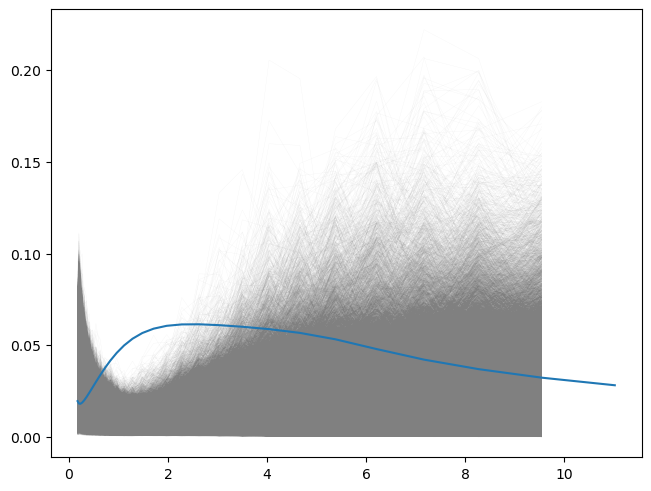

In [35]:
line_collections_noflow3_global_ws = get_line_segs(noflow3_wps.period/60., noflow3_wps.global_ws_unbias_coi.reshape(-1,noflow3_wps.global_ws_unbias_coi.shape[-1]),
                                                colors="grey",alpha=0.1,lw=0.2)


fig, ax = plt.subplots(layout='constrained')

ax.add_collection(line_collections_noflow3_global_ws)
ax.plot(noflow3_wps.period/60., noflow3_wps.global_signif_unbias)

fig.canvas.draw()